K-means & Hierarchical Clustering 

This case requires developing a customer segmentation to define marketing strategy. The sample Dataset summarizes the usage behavior of about 9000 active credit cardholders during the last 6 months. The file is at a customer level with 18 behavioral variables.
CUST_ID: Identification of credit cardholder (Categorical)

BALANCE: Balance amount left in their account to make purchases (BALANCE_FREQUENCY : How frequently the Balance is updated, score between 0 and 1 (1 = frequently updated, 0 = not frequently updated)) 

PURCHASES: Amount of purchases made from the account

ONEOFF_PURCHASES: Maximum purchase amount done in once

 INSTALLMENTS_PURCHASES: Amount of purchase done in installments

 CASH_ADVANCE: Cash in advance given by the user

PURCHASES_FREQUENCY: How frequently the purchases are being made, score between 0 and 1 (1 = frequently purchased, 0 = not frequently purchased)

 ONEOFFPURCHASESFREQUENCY: How frequently purchases are happening at once (1 = frequently purchased, 0 = not frequently purchased)

 PURCHASESINSTALLMENTSFREQUENCY: How frequently purchases in installments are being made (1 = frequently done, 0 = not frequently done)

CASHADVANCEFREQUENCY: How frequently the cash in advance is being paid 

CASHADVANCETRX: Number of transactions made with "Cash in Advance" PURCHASES_TRX: Number of purchase transactions made

 CREDIT_LIMIT: Limit of credit card for user 

PAYMENTS: Amount of payment done by userMINIMUM_PAYMENTS: Minimum amount of payments made by user PRCFULLPAYMENT: Percent of full payment paid by userTENURE: Tenure of credit card service for user

1. Load your dataset. 

In [1]:
#Load dataset
import pandas as pd
data=pd.read_csv("C:/Users/rania/Downloads/CC GENERAL.csv")
data

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.00,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8945,C19186,28.493517,1.000000,291.12,0.00,291.12,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,325.594462,48.886365,0.500000,6
8946,C19187,19.183215,1.000000,300.00,0.00,300.00,0.000000,1.000000,0.000000,0.833333,0.000000,0,6,1000.0,275.861322,NaN,0.000000,6
8947,C19188,23.398673,0.833333,144.40,0.00,144.40,0.000000,0.833333,0.000000,0.666667,0.000000,0,5,1000.0,81.270775,82.418369,0.250000,6
8948,C19189,13.457564,0.833333,0.00,0.00,0.00,36.558778,0.000000,0.000000,0.000000,0.166667,2,0,500.0,52.549959,55.755628,0.250000,6


In [2]:
#Eliminate the useless column 
data=data.drop("CUST_ID", axis=1)

In [3]:
#Verify missing values 
data.isnull().sum()

BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

We have 313 missing values for the feature Minimum_Payments and only 1 for Credit_limit.

In [4]:
#replace the missing values of the two features
data['MINIMUM_PAYMENTS'].fillna( data['MINIMUM_PAYMENTS'].mean(), inplace=True )
data['CREDIT_LIMIT'].fillna( data['CREDIT_LIMIT'].mean(), inplace=True )

In [5]:
#verify that our data is ready to be treated
data.isnull().sum()

BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

2. Use hierarchical clustering to identify the inherent groupings within your data.

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
from sklearn import metrics

In [7]:
from sklearn.cluster import AgglomerativeClustering #Importing our clustering algorithm : Agglomerative
model=AgglomerativeClustering(n_clusters=5, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(data)  #Applying agglomerative algorithm with 5 clusters, using euclidean distance as a metric

In [8]:
agglomerative=pd.DataFrame(clust_labels)
agglomerative # number of clusters for each point

,0
0,0
1,0
2,0
3,0
4,0
...,...
8945,0
8946,0
8947,0
8948,0


3. Plot the clusters. 

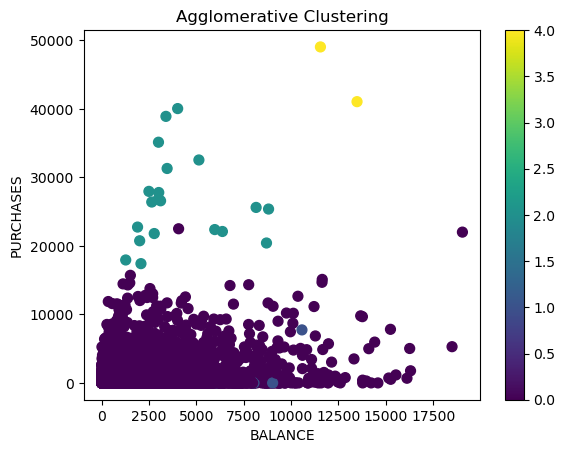

In [9]:
#Plot the clusters between balance and purchases
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['BALANCE'] , data ['PURCHASES'] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("BALANCE")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)


In this plot, there are 4 clusters and we can notice that most of the customers don't make a lot of purchases and also don't have a lot of money left in their account. We can also notice that there is another group of people that make purchases between approximately 20000 and 40000 and their balance doesn't exceed 10000. Finally, we can see that the group in yellow is composed of 2 rich people who make really expensive purchases and also have a lot of money left in their account. 
From this plot, Most of the people are from the working class (they don't spend a lot and they don't have a lot of money left in their bank account). 

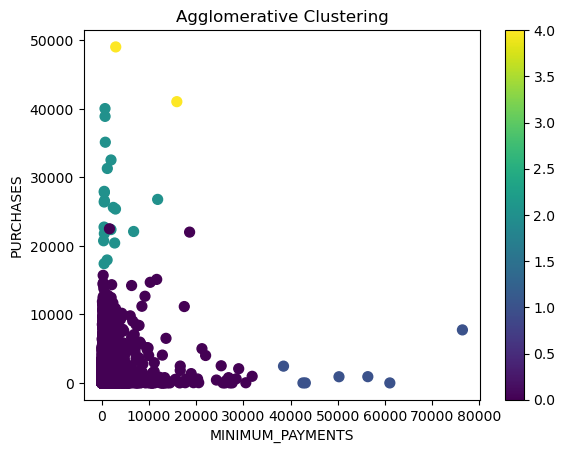

In [10]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['MINIMUM_PAYMENTS'] , data ['PURCHASES'] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("MINIMUM_PAYMENTS")
ax.set_ylabel("PURCHASES")
plt.colorbar(scatter)

In this plot, we can also notice 4 clusters. 
People in dark purple don't make many purchases and the majority of them don't pay higher than 10000.
People in green make a lot of purchases but they also make minimum payments for these purchases.
People in blue don't make a lot of purchases but their minimum payments exceed 40000 which is make them a compulsives shoppers.
People in yellow are those who make huge purchases but the don't pay more than 20000 for these purchases.

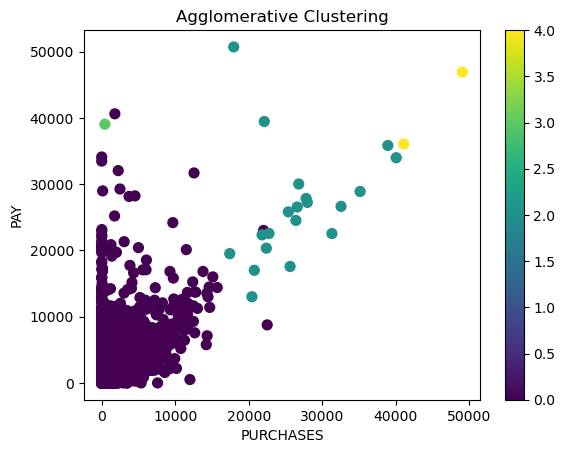

In [11]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PURCHASES'] , data ['PAYMENTS'] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("PAY")
plt.colorbar(scatter)

For most of the purchases which are under 15000, people can pay the whole sum. When the purchases exceed a specific amount, the number of people decreases and when the sum of purchases exceeds 40000 we can see that only rich people can pay. 
Most of cardholders can't afford exorbitant prices. 

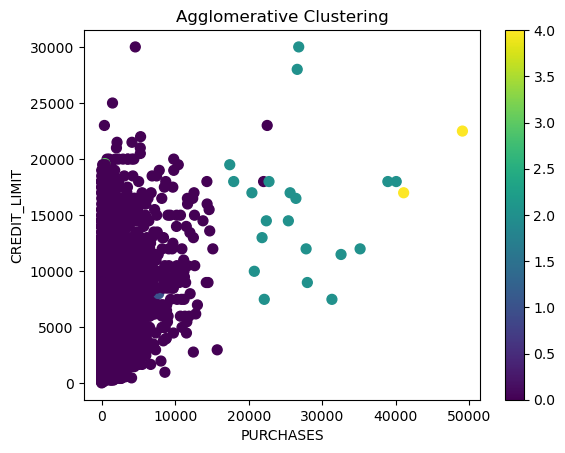

In [12]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PURCHASES'] , data ['CREDIT_LIMIT'] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("CREDIT_LIMIT")
plt.colorbar(scatter)

For the first cluster, cardholders don't make a lot of purchases, so they don't exceed the limit allowed. For the second cluster, we can notice that these people make purchases between 20000 and almost 40000, the majority don't exceed the credit limit also. For the last cluster, there are only 2 people who are buying very expensive things. 

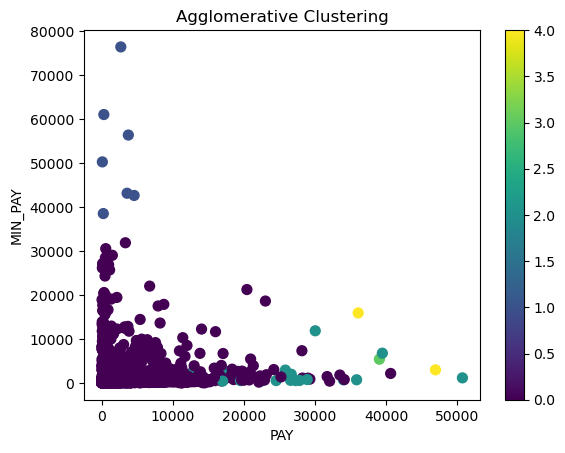

In [13]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PAYMENTS'] , data ['MINIMUM_PAYMENTS'] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("PAY")
ax.set_ylabel("MIN_PAY")
plt.colorbar(scatter)

Most of cardholders are minimum payers however we can notice that there is a group pays up to 80000 which can show us a disparity of payment.

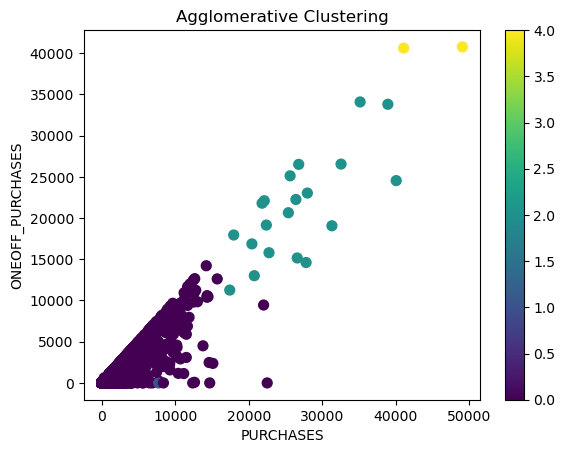

In [14]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['PURCHASES'] , data ['ONEOFF_PURCHASES'] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("PURCHASES")
ax.set_ylabel("ONEOFF_PURCHASES")
plt.colorbar(scatter)

We can distinguish 3 relevant clusters. 
People in dark purple don't spend more than 15000 for a maximum purchase done in once. 
People in green they spend up to 35000 for a purchase done once.
People in yellow are the richest ones and they are allowed to spend approximately 40000 on purchase done in once. 

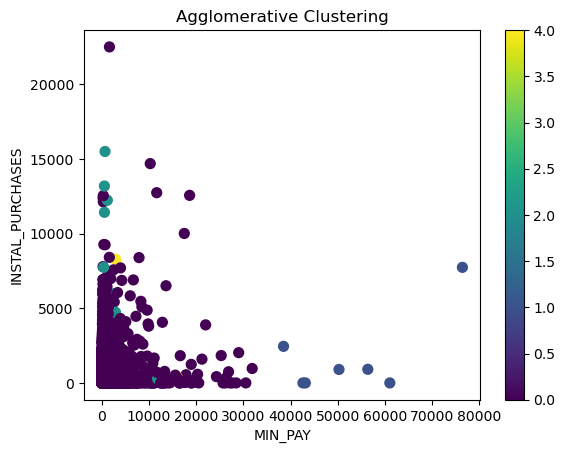

In [15]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['MINIMUM_PAYMENTS'] , data ['INSTALLMENTS_PURCHASES'] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("MIN_PAY")
ax.set_ylabel("INSTAL_PURCHASES")
plt.colorbar(scatter)

In this plot we have 4 different clusters
An installment purchase is when the buyer pays the seller the full purchase price by making a series of partial payments over time. In this case, people in dark purple, green and yellow are likely to make a partial payments over time and the minimum payments are under 10000 so most of them are from the working class. Only people in blue can pay huge amounts even for minimum payments and they don't need to pay over a long period of time. 

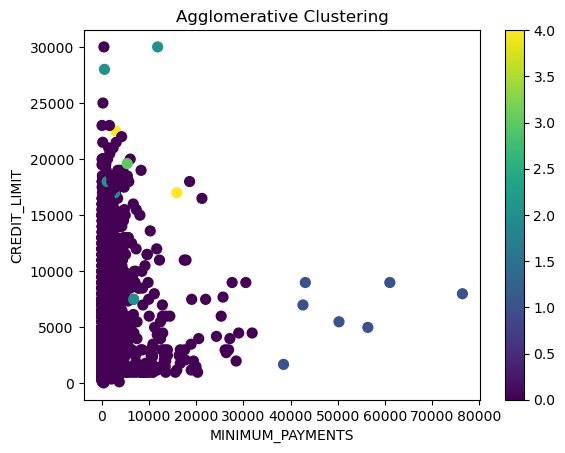

In [17]:
fig =plt.figure()
ax = fig.add_subplot(111)
scatter = ax.scatter (data ['MINIMUM_PAYMENTS'] , data ['CREDIT_LIMIT'] , c= agglomerative[0], s=50)
ax.set_title("Agglomerative Clustering")
ax.set_xlabel("MINIMUM_PAYMENTS")
ax.set_ylabel("CREDIT_LIMIT")
plt.colorbar(scatter)

In this plot, we can notice 5 clusters where 4 are interfered showing that most of the people with a credit limit doesn't exceed 20000 and with an amount of minimum payments that doesn't exceed 30000. For the blue cluster, these people have the less amounts for the limit of credit card because they already spend a lot of money even with minimum payments.  

4. Plot the dendrogram. Use K-means clustering. 

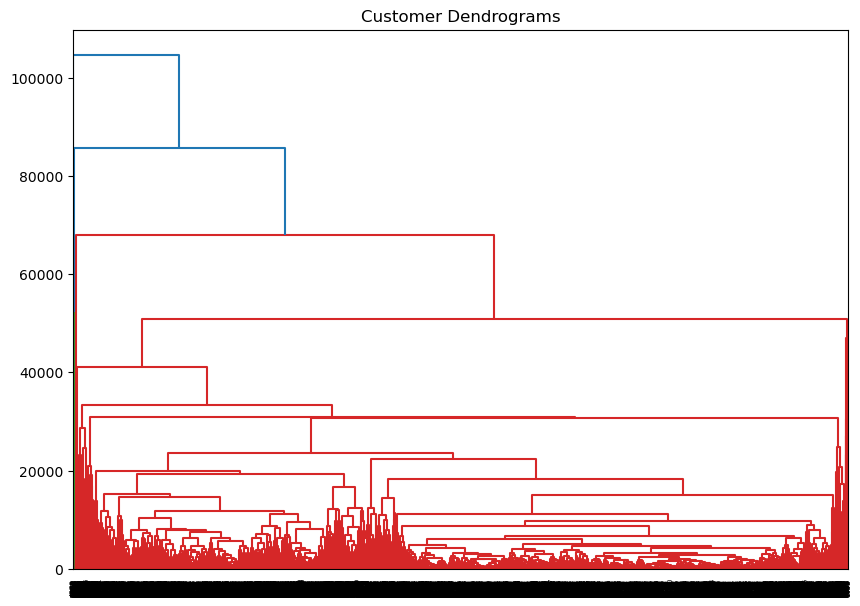

In [19]:
#Plot the dendogram
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10,7))
plt.title("Customer Dendrograms")
dend=shc.dendrogram(shc.linkage(data, method="complete"))
#We can use a dendrogram to:
#Capture the hierarchical relationship between the clusters.
#Understand how each cluster was made.
#Choose the right value of the final K clusters.

This a visualization how the groups were made.

In [20]:
#K-Means clustering
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(data)
labels=pd.DataFrame(kmeans.labels_) #print the label of each point in our data after the clustering is done.
labels

,0
0,2
1,3
2,0
3,0
4,2
...,...
8945,2
8946,2
8947,2
8948,2


In [21]:
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.

[[1.64537108e+03 9.06571096e-01 1.45419148e+03 9.06744948e+02
  5.47837125e+02 8.37160309e+02 5.79867638e-01 3.29338718e-01
  4.01525477e-01 1.16996605e-01 2.74395161e+00 2.08137097e+01
  6.83100257e+03 2.00861580e+03 6.51292434e+02 1.96350019e-01
  1.17564516e+01]
 [4.77562301e+03 9.07656920e-01 1.17303879e+04 8.39438634e+03
  3.33619804e+03 5.15643806e+03 7.66152580e-01 6.22972723e-01
  6.10439875e-01 2.05018920e-01 8.76785714e+00 8.89910714e+01
  1.26651786e+04 1.90125148e+04 2.44038946e+03 3.56370107e-01
  1.18571429e+01]
 [7.90668870e+02 8.48861241e-01 4.87194995e+02 2.33808544e+02
  2.53687507e+02 4.86816632e+02 4.46712142e-01 1.26616459e-01
  3.43942985e-01 1.10376268e-01 2.30770652e+00 9.21604140e+00
  2.19408273e+03 8.77458997e+02 5.31582199e+02 1.45499032e-01
  1.13716503e+01]
 [5.47822012e+03 9.57426814e-01 1.53169429e+03 9.44610426e+02
  5.87159001e+02 3.83993108e+03 4.72730906e-01 2.67277979e-01
  3.49923368e-01 3.29140566e-01 9.69023569e+00 2.15005612e+01
  1.09480971e+04

5. Try different K values and select the best one. 

In [25]:
#One of the methods used to determine the best K-value is the elbow method
#Sum of Squared Error(SSE) is used to determine the sum of the squared difference between the cluster center and each observation related to that cluster.
#Calculating the squared distance of each point from its closest cluster.
Sum_Squared_Distances= []
K = range(1,15)
for k in K:
    km= KMeans(n_clusters=k)
    km= km.fit(data)
    Sum_Squared_Distances.append(km.inertia_)
    


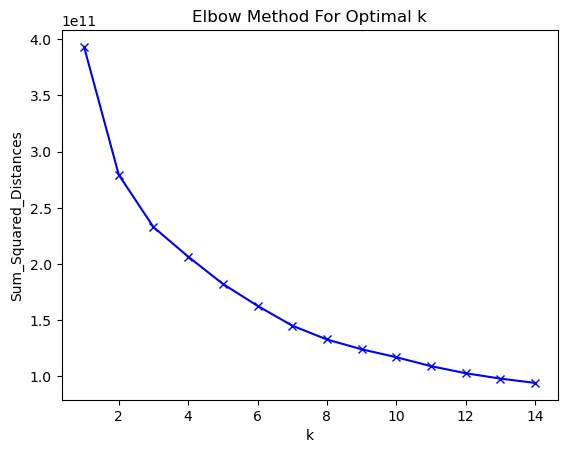

In [27]:
plt.plot(K, Sum_Squared_Distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_Squared_Distances')
plt.title('Elbow Method For Optimal k')
plt.show()
#the Elbow method is used to try to minimize SSE
#The plot is like an arm, the elbow is the optimal K.

The optimal K value is 3 in this case.

In [43]:
kmeans=KMeans(n_clusters=3)  #Cluster our data by choosing 3 as number of clusters based on the Elbow method
kmeans.fit(data)
kmeans.predict(data)
print(kmeans.cluster_centers_)   #Printing the coordinates of cluster centers.


[[8.58749574e+02 8.54658547e-01 6.07552226e+02 3.15547760e+02
  2.92301747e+02 4.97572657e+02 4.68035083e-01 1.54975678e-01
  3.52310695e-01 1.06823669e-01 2.25675057e+00 1.06945843e+01
  2.76473959e+03 9.99870454e+02 5.85674510e+02 1.57275661e-01
  1.14353928e+01]
 [3.41876385e+03 9.40760903e-01 1.58656454e+03 9.90437055e+02
  5.96443581e+02 2.13223800e+03 5.39893312e-01 3.17082157e-01
  3.85775570e-01 2.11859261e-01 5.77836645e+00 2.22269316e+01
  9.04278346e+03 2.91488772e+03 1.57554170e+03 1.33034222e-01
  1.17359823e+01]
 [4.84189326e+03 9.11252077e-01 1.07893056e+04 7.61968438e+03
  3.16979046e+03 5.15222013e+03 7.52377608e-01 5.99535492e-01
  6.04122562e-01 2.26540108e-01 9.20000000e+00 8.62000000e+01
  1.24657692e+04 1.81174305e+04 2.51500153e+03 3.34474108e-01
  1.18384615e+01]]


6. Plot the clusters. 

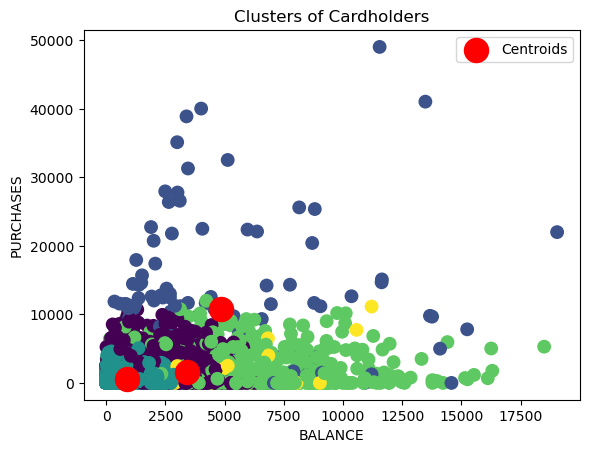

In [46]:
plt.scatter(data["BALANCE"], data["PURCHASES"], s=80, c=labels)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 2], s=300, c='red', label = 'Centroids')
plt.title('Clusters of Cardholders')
plt.xlabel('BALANCE')
plt.ylabel('PURCHASES')
plt.legend()
plt.show()

In this case, we found that the optimal k is 3 so here we have three centroids and they are close to each other.
 BUT, I didn't understand why there 5 different colors while I chose to work only with three clusters?  

I didn't interpret all the other plots because I would like to know what's wrong first!

7. Compare the two results.  
For the plot PURCHASES and BALANCE:
For the hierarchical clustering, agglomerative method we have 3 distinctive clusters. 
We can say that: Most of the people are from the working class (they don't spend a lot and they don't have a lot of money left in their bank account and there those who don't make a lot purchases and are saving money), then we find those people who don't have too much money left in their account but still make a lot of purchases and the last cluster shows the people who have the highest balance and make a lot purchases (rich people). 
For the Kmeans method, we have a fixed number of clusters which is 3 with three different centroids but the plot shows 5 different clusters? 

Bonus: Search for another validation metric

In [52]:
from sklearn.metrics import silhouette_score
print(f'Silhouette Score(n=3): {silhouette_score(data, labels)}')

C:\Users\rania\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Silhouette Score(n=3): 0.37854107966520756


Silhouette Coefficient or silhouette score is a metric used to calculate the goodness of a clustering technique. Its value ranges from -1 to 1.

1: Means clusters are well apart from each other and clearly distinguished.

0: Means clusters are indifferent, or we can say that the distance between clusters is not significant.

-1: Means clusters are assigned in the wrong way.

The result we obtaine is almost 0.4, so we can say that the distance is not significant. 